# DS 3000 - Assignment 7

**Student Name**: Ryan Tietjen

**Date**: 02/24/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(0pts) Load the attached data into a pandas dataframe


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('diamonds.csv')

## Question 2: 
(5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.


In [2]:
prices = df['price'].describe().round(2)
carats = df['carat'].describe().round(2)

print(prices)
print()
print(carats)

count    53940.00
mean      3932.80
std       3989.44
min        326.00
25%        950.00
50%       2401.00
75%       5324.25
max      18823.00
Name: price, dtype: float64

count    53940.00
mean         0.80
std          0.47
min          0.20
25%          0.40
50%          0.70
75%          1.04
max          5.01
Name: carat, dtype: float64


## Question 3:

(5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

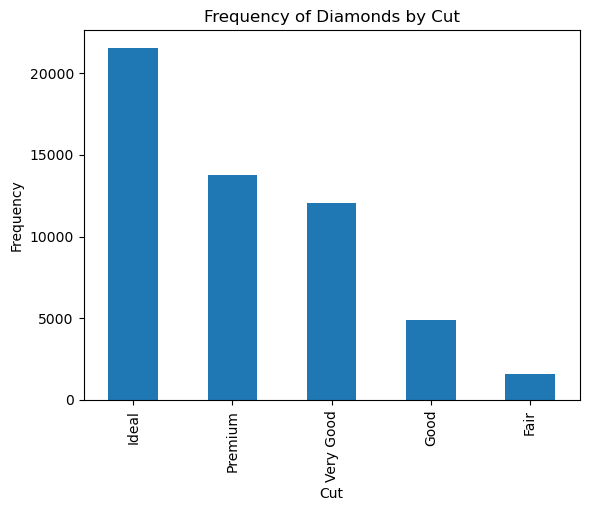

In [3]:
cut_frequencies = df['cut'].value_counts()
cut_frequencies.plot(kind='bar')
plt.title('Frequency of Diamonds by Cut')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.show()

This bar chart shows the frequency of diamonds by cut. The Cut type is found on the x axis and the frequency is found on the y axis. Out of the five cut types, it appears that ideal cuts are appear most frequently.

## Question 4:
(5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

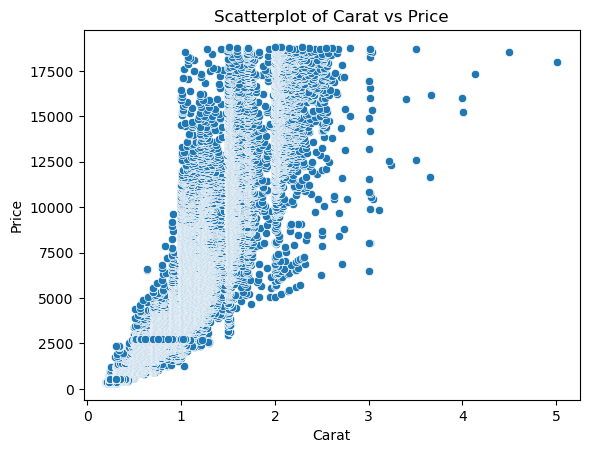

In [4]:
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sb.scatterplot(x='carat', y='price', data=df)
plt.title('Scatterplot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

This scatterplot shows the relationship between diamond carat and price. The carat is on the x axis and the price is on the y axis. It appears that carat and price display a strong positive correlation. In essence, the price tends to increase as the carat increases.

## Question 5:
(10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [5]:
#finds the Pearson Correlation coefficient
#corr() finds the correlation
#iloc gets a specific element from the array returned by corr()
print(df[['carat', 'price']].corr().iloc[0,1].round(2))

0.92


A Pearson Correlation coefficient of 0.92 indicates that there is a strong positive correlation between carat and price.

## Question 6:
15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.
Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

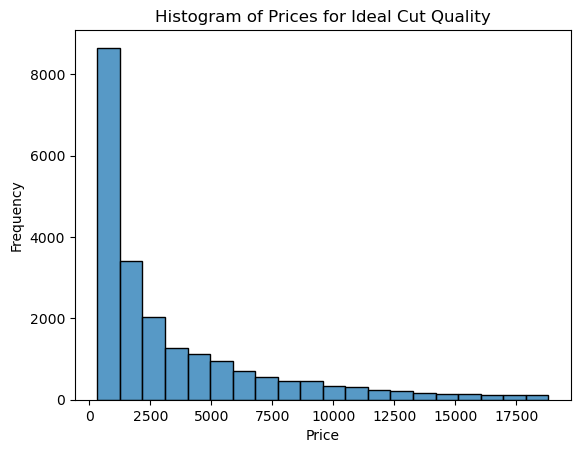

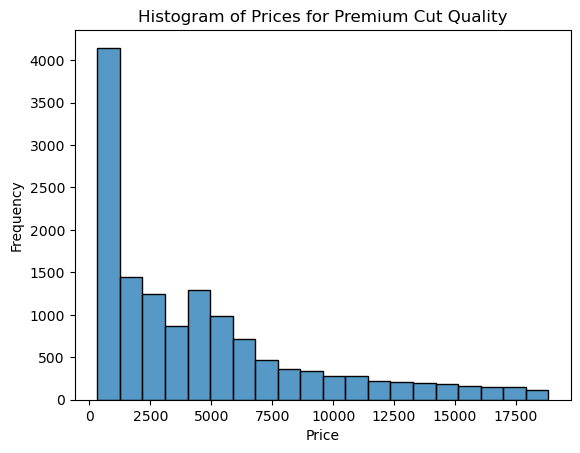

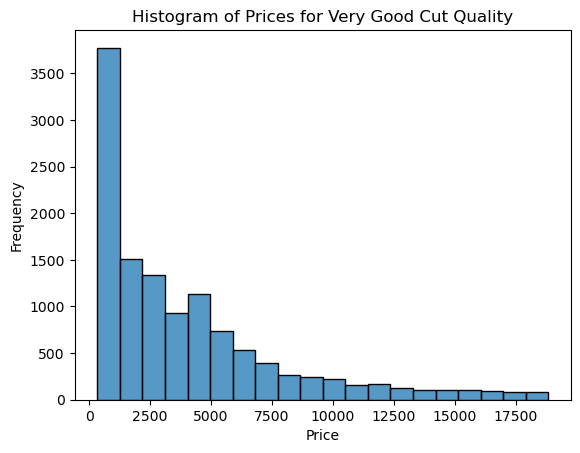

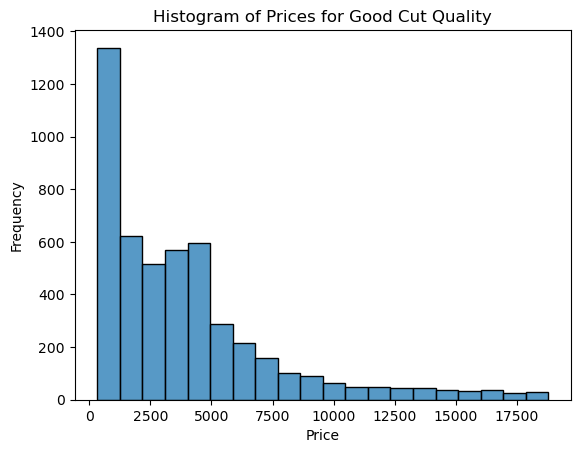

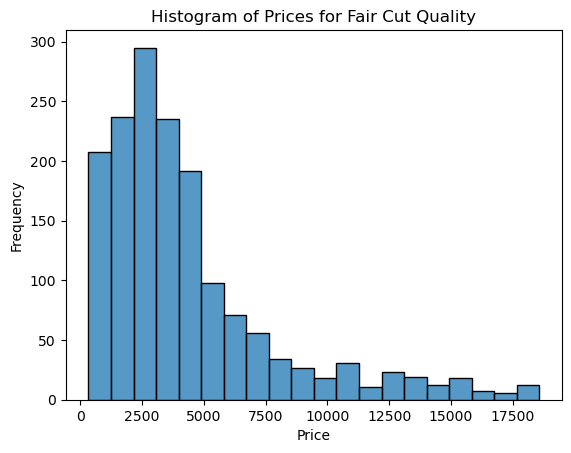

In [6]:
sb.histplot(df[df['cut'] == 'Ideal']['price'], bins=20) 
plt.title(f'Histogram of Prices for Ideal Cut Quality')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sb.histplot(df[df['cut'] == 'Premium']['price'], bins=20) 
plt.title(f'Histogram of Prices for Premium Cut Quality')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sb.histplot(df[df['cut'] == 'Very Good']['price'], bins=20) 
plt.title(f'Histogram of Prices for Very Good Cut Quality')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sb.histplot(df[df['cut'] == 'Good']['price'], bins=20) 
plt.title(f'Histogram of Prices for Good Cut Quality')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sb.histplot(df[df['cut'] == 'Fair']['price'], bins=20) 
plt.title(f'Histogram of Prices for Fair Cut Quality')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

These histograms show the relationship between frequency and price for each diamond cut quality. Frequency is on the y axis and price is on the x axis. Bin sizes of 20 are used in each histogram, and each histogram displays a right skew. It appears that as cut quality worsens, the skew becomes less strong. 

## Question 7:
(10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05

In [7]:
#https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_ind.html#scipy.stats.mstats.ttest_ind
from scipy import stats

# T test with Good and Very Good
t_statistic, p_value = stats.ttest_ind(df[df['cut'] == 'Good']['price'], df[df['cut'] == 'Very Good']['price'])

print(f"Since {p_value.round(2)} > a=0.05, there no statistical difference between Good and Very Good cuts")

# T test with preimum and ideal
t_statistic, p_value = stats.ttest_ind(df[df['cut'] == 'Premium']['price'], df[df['cut'] == 'Ideal']['price'])
print(f"Since {p_value.round(2)} < a=0.05, there a statistical difference between Preium and Ideal cuts")

Since 0.42 > a=0.05, there no statistical difference between Good and Very Good cuts
Since 0.0 < a=0.05, there a statistical difference between Preium and Ideal cuts


## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
